In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [151]:
df =pd.read_csv('movieDB_API_movies_w_gross_profits_&_ROI.csv')

In [162]:
df.sort_values(by='ROI (%)',ascending=False).head()

,Unnamed: 0,budget,genres,id,imdb_id,popularity,release_date,revenue,runtime,title,vote_average,vote_count,gross_profit,ROI (%)
3309,5332,15000,"['Horror', 'Mystery']",23827,tt1179904,14.949,2009-09-25,193355800,86.0,Paranormal Activity,5.9,3125,193340800.0,1.288939e+06
2693,4348,60000,"['Horror', 'Mystery']",2667,tt0185937,11.060,1999-07-14,248000000,81.0,The Blair Witch Project,6.3,2603,247940000.0,4.132333e+05
2292,3733,12000,"['Comedy', 'Crime']",692,tt0069089,6.530,1972-03-12,6000000,92.0,Pink Flamingos,6.5,232,5988000.0,4.990000e+04
4173,6757,100000,"['Horror', 'Thriller']",299245,tt2309260,6.964,2015-07-10,42664410,87.0,The Gallows,4.8,657,42564410.0,4.256441e+04
3914,6302,130000,"['Drama', 'Thriller', 'Horror']",83,tt0374102,7.539,2003-12-29,54667954,79.0,Open Water,5.4,646,54537954.0,4.195227e+04


##  Create subset to filter out movies with no known gross profit

In [164]:
movies_with_gross_profit = df[df['gross_profit'].notna()]

In [165]:
movies_with_gross_profit.shape

(4273, 14)

In [192]:
movies_with_gross_profit['ROI (%)'] = movies_with_gross_profit['ROI (%)'].map(lambda x: round(x,2))

In [183]:
# plot distribution of ROIs in our subset

In [199]:
movies_with_gross_profit['ROI (%)'].mean()

851.5671074186781

In [239]:
# filter out data for outliers (anything past 2 std away)
def reject_outliers(data, m=2):
    data[abs(data['ROI (%)'] - np.mean(data['ROI (%)'])) < m * np.std(data['ROI (%)'])]
    return data

In [241]:
# movies where gross profit is not null filtered out for outliers based on the ROI column
subset_movies = reject_outliers(movies_with_gross_profit)

In [242]:
subset_movies.shape

(4273, 15)

In [243]:
subset_roi = reject_outliers(movies_with_gross_profit)['ROI (%)']

In [244]:
subset_roi.describe()

count    4.273000e+03
mean     8.515671e+02
std      2.077841e+04
min     -1.000000e+02
25%      1.479000e+01
50%      1.458000e+02
75%      3.738300e+02
max      1.288939e+06
Name: ROI (%), dtype: float64

In [212]:
filtered_roi = movies_with_gross_profit[(movies_with_gross_profit['ROI (%)'] > 5000) & (movies_with_gross_profit['ROI (%)'] < 20000) ]['ROI (%)']

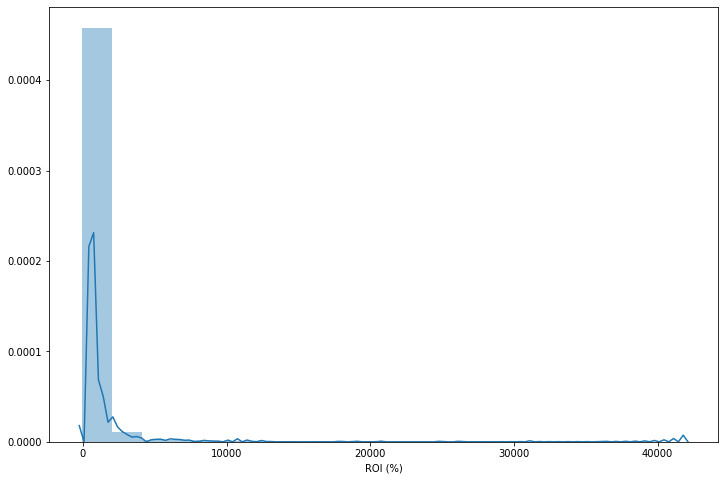

In [218]:
plt.figure(figsize=(12,8))
sns.distplot(subset_roi,bins=20)

## Analyzing length of movie and movie profit

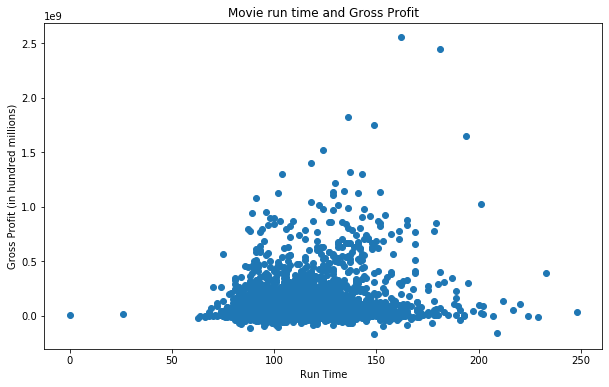

In [249]:
plt.figure(figsize=(10,6))
plt.scatter(subset_movies['runtime'],subset_movies['gross_profit']);
plt.title('Movie run time and Gross Profit')
plt.xlabel('Run Time')
plt.ylabel('Gross Profit (in hundred millions)')
plt.show()


In [233]:
# looks like we can find a good movie length.... look further...

Plotting the run time and mean of gross profit

In [179]:
group_rt_gp = movies_with_gross_profit.groupby('runtime')['gross_profit'].mean().reset_index()

In [181]:
group_rt_gp

,runtime,gross_profit
0,0.0,3859734.0
1,26.0,18000000.0
2,63.0,-15540000.0
3,64.0,788000.0
4,66.0,-3566549.0
...,...,...
135,220.0,109700000.0
136,224.0,2900000.0
137,229.0,-14700000.0
138,233.0,396176459.0


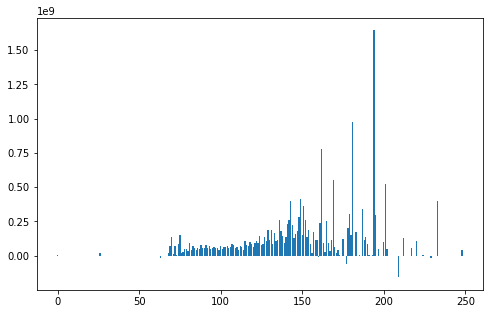

In [180]:
plt.figure(figsize=(8,5));
plt.bar(group_rt_gp['runtime'],group_rt_gp['gross_profit']);
plt.show()


In [182]:
# whats the average runtime for movies with their ROI over a certain amount

## Analyzing release month and gross profit

1. Is there a month where people will spend more to watch a movie? 
2. Maybe we should release our film during a specific time of the year?

In [170]:
# Creating pandas datetime from the release date string
movies_with_gross_profit['release_date'] = pd.to_datetime(movies_with_gross_profit['release_date'])

In [171]:
# Adding column for the month of year it was released
movies_with_gross_profit['release_month'] = pd.DatetimeIndex(movies_with_gross_profit['release_date']).month

In [172]:
# creating table for the plot
grouped_by_month = movies_with_gross_profit.groupby(['release_month']).mean().reset_index()
month_and_gp =grouped_by_month[['release_month','gross_profit']]
month_and_gp

,release_month,gross_profit
0,1,4.318331e+07
1,2,6.030782e+07
2,3,7.743303e+07
3,4,8.725812e+07
4,5,1.334785e+08
5,6,1.410546e+08
6,7,1.078288e+08
7,8,4.811661e+07
8,9,3.912906e+07
9,10,6.203410e+07


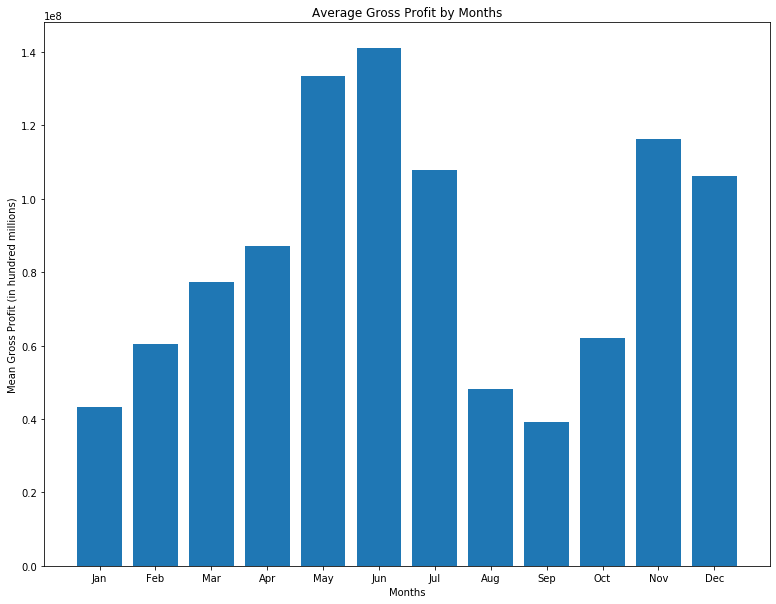

In [173]:
plt.figure(figsize=(13,10));
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(x=months,height=month_and_gp['gross_profit']);
plt.xlabel('Months')
plt.ylabel('Mean Gross Profit (in hundred millions)')
plt.title('Average Gross Profit by Months')
plt.show()

Looks like movies which are released in early summer (June) have a better gross profit

Lets see if this theory holds true for revenue (sales)

In [174]:
# repeating process for revenue
grouped_by_month = movies_with_gross_profit.groupby(['release_month']).mean().reset_index()
month_and_r =grouped_by_month[['release_month','revenue']]
month_and_r

,release_month,revenue
0,1,7.202181e+07
1,2,9.328612e+07
2,3,1.179174e+08
3,4,1.257822e+08
4,5,1.859021e+08
5,6,1.942450e+08
6,7,1.552442e+08
7,8,8.015194e+07
8,9,6.455511e+07
9,10,9.522860e+07


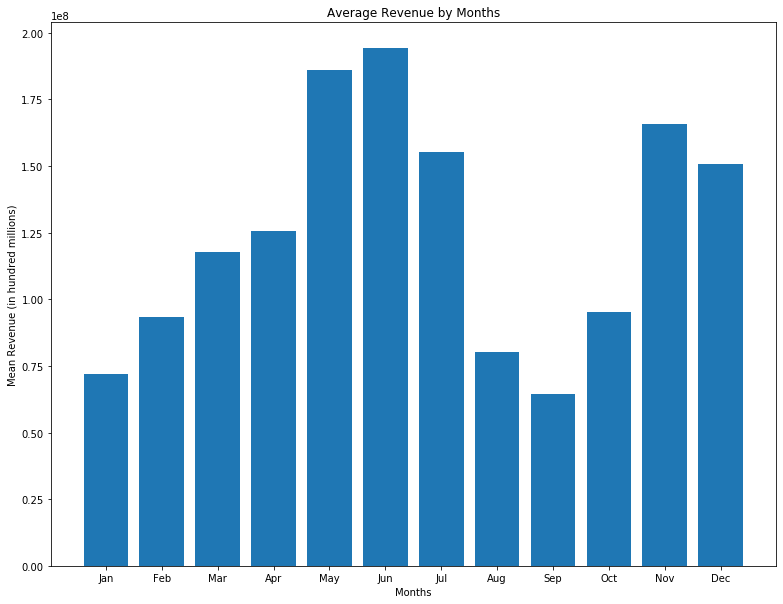

In [175]:
plt.figure(figsize=(13,10));
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(x=months,height=month_and_r['revenue']);
plt.xlabel('Months')
plt.ylabel('Mean Revenue (in hundred millions)')
plt.title('Average Revenue by Months')
plt.show()

Indeed! Movies released in June have the highest revenue! cool

In [248]:
# the analysis below is messed up due to the crazy ROIs for movies released in september, 
# I would recommend only looking at revenue to analyze best months for sales

In [245]:
grouped_by_month = subset_movies.groupby(['release_month']).mean().reset_index()
month_and_roi =grouped_by_month[['release_month','ROI (%)']]
month_and_roi

,release_month,ROI (%)
0,1,368.027552
1,2,383.099018
2,3,513.903148
3,4,421.877088
4,5,399.070503
5,6,455.621360
6,7,1731.265531
7,8,454.715797
8,9,3088.611871
9,10,544.303032


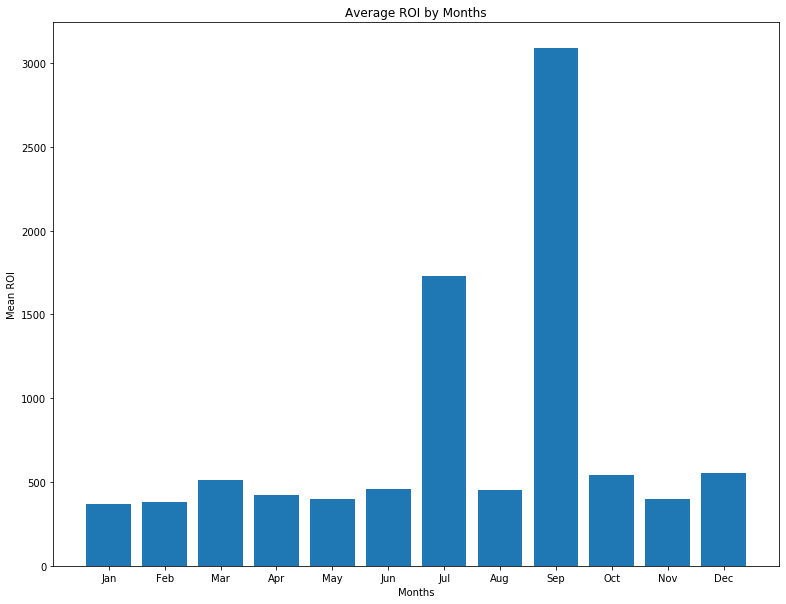

In [246]:
plt.figure(figsize=(13,10));
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(x=months,height=month_and_roi['ROI (%)']);
plt.xlabel('Months')
plt.ylabel('Mean ROI')
plt.title('Average ROI by Months')
plt.show()